<a href="https://colab.research.google.com/github/PrudhviRaj33/Churn-Prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as p
import seaborn as sns

In [ ]:
#loading the dataset
data=pd.read_csv(r"/content/drive/MyDrive/Internship /Data Science/Telco_Customer_Churn_Dataset  (3).csv")

#copy of the dataset
data_backup=data.copy()

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
len(data)

7043

In [ ]:
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#check for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data_backup.loc[data_backup['TotalCharges'].isnull()==True]

NameError: name 'data_backup' is not defined

In [ ]:
#deleting the column customer id
del data['customerID']

In [ ]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.groupby('Churn').MonthlyCharges.describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [ ]:
#visualization
f1=p.pie(data,names="Churn")
f1

In [ ]:
#data Preprocessing
df_preprocessed=data.copy()

In [ ]:
cols1=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for i in cols1:
  if i=='gender':
    df_preprocessed[i]=df_preprocessed[i].map({'Female':0, 'Male':1})
  else:
    df_preprocessed[i]=df_preprocessed[i].map({'Yes':1,'No':0})

In [ ]:
df_preprocessed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
#data preprocessing
from sklearn.preprocessing import LabelEncoder
laenc=LabelEncoder()

In [ ]:
# label_encoders={}
df1=df_preprocessed.copy()
for i in df_preprocessed.columns:
  # label_encoders[i] = LabelEncoder()
  df1[i]=laenc.fit_transform(df_preprocessed[i])

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [ ]:
x=df1.drop('Churn',axis=1)

In [ ]:
y=df1['Churn']

In [ ]:
#Dataset splitting into training and testing
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


**Exploratory Data Analysis**

In [ ]:
#EDA
df1.corr(numeric_only=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.090756,-0.195525


In [ ]:
df1["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
 print(df1['tenure'].max())

72


In [ ]:
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
df1['tenure_group']=pd.cut(df1.tenure,range(1,80,12),right=False,labels=labels)

In [ ]:
df1['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
df1.drop('tenure',axis=1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0,1 - 12
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0,25 - 36
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1,1 - 12
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0,37 - 48
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0,13 - 24
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0,61 - 72
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,137,2994,0,1 - 12
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1,1 - 12


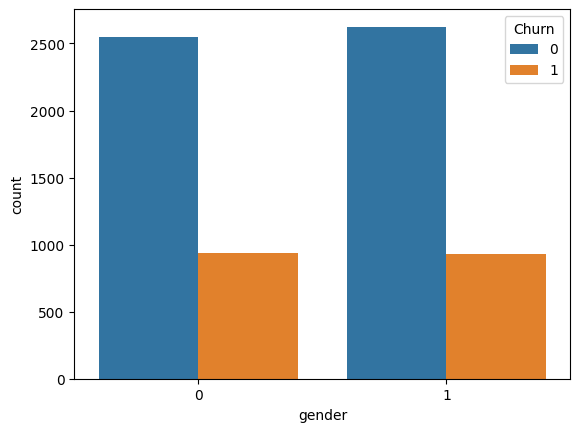

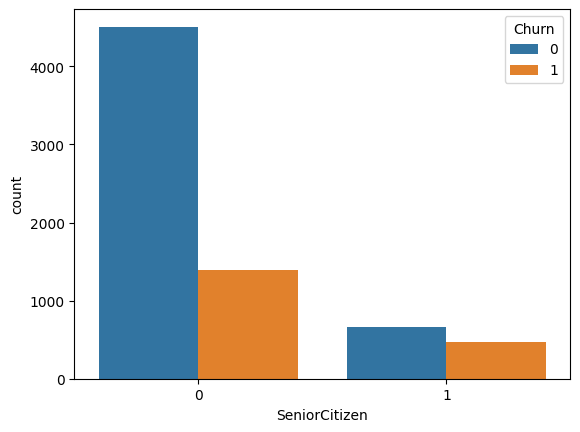

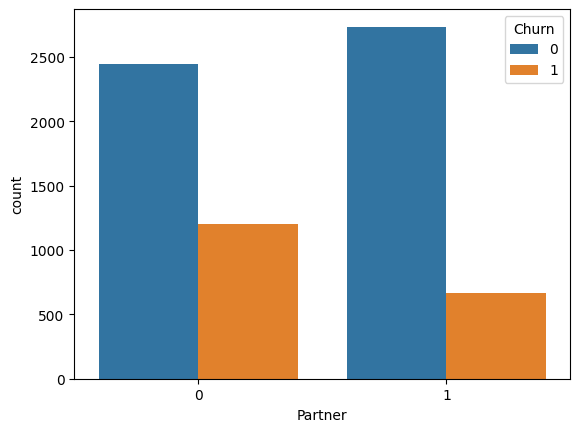

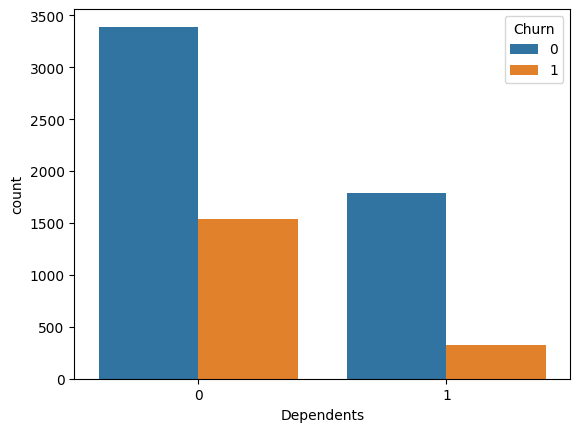

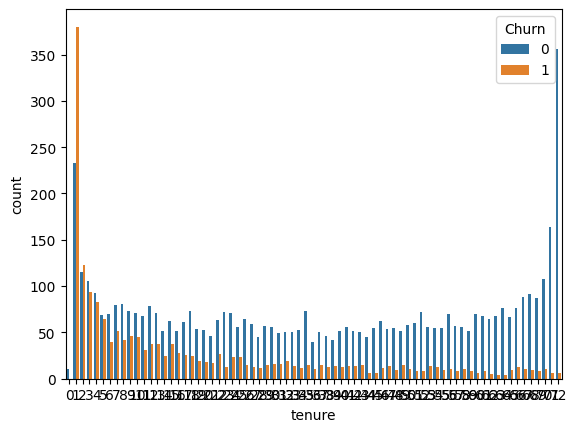

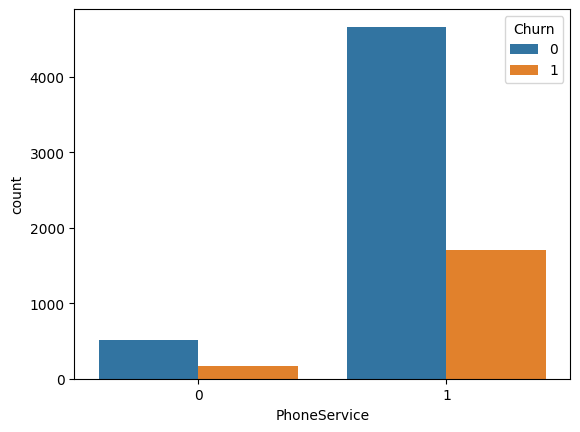

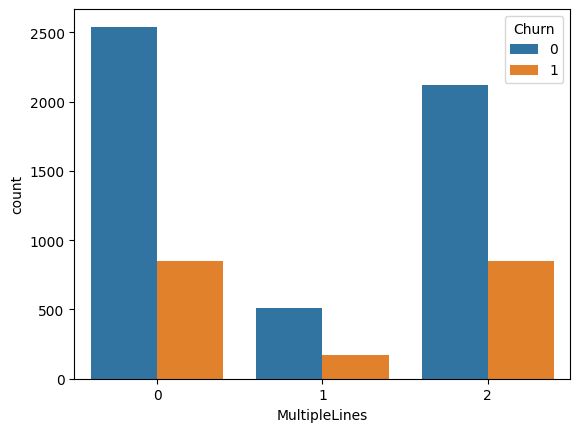

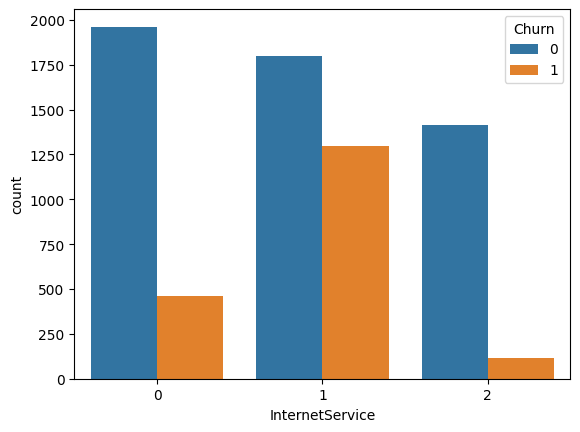

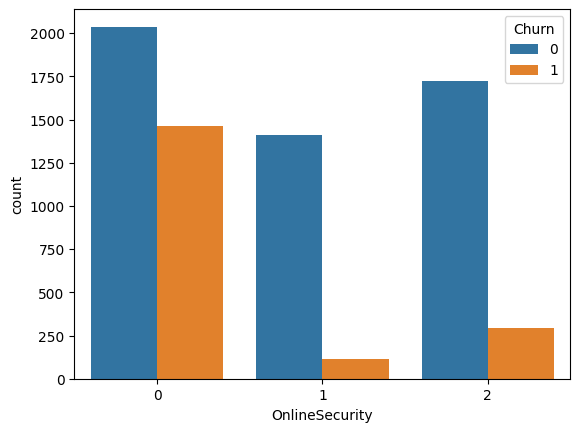

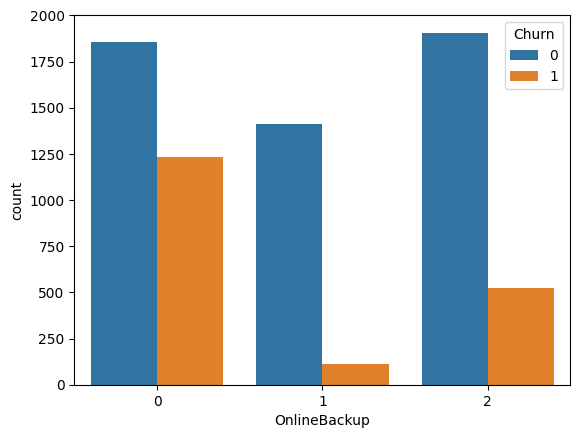

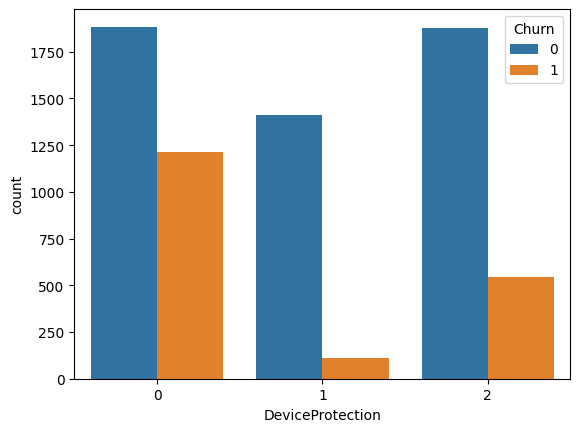

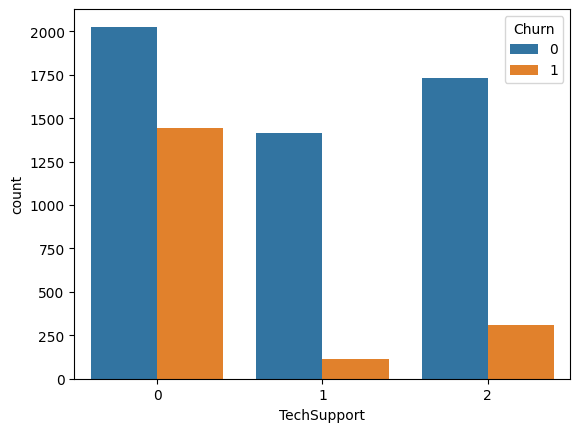

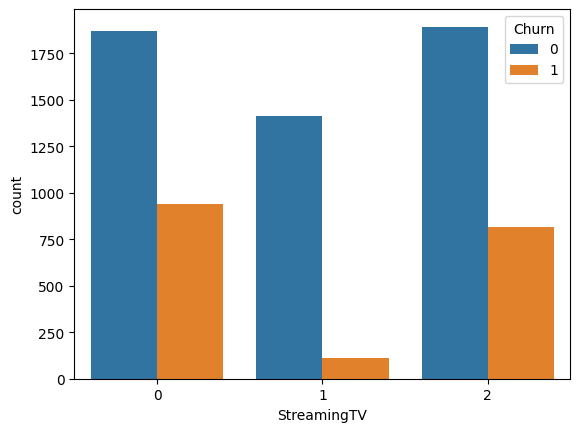

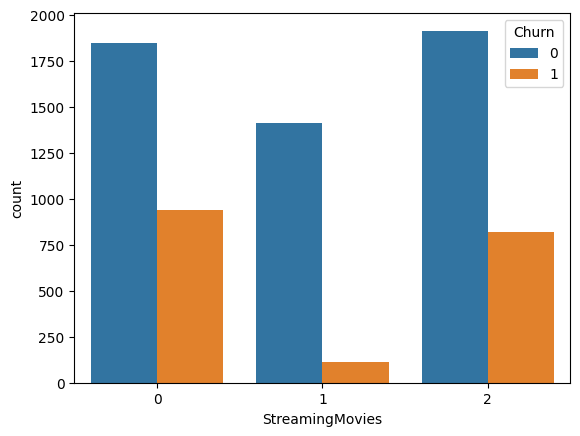

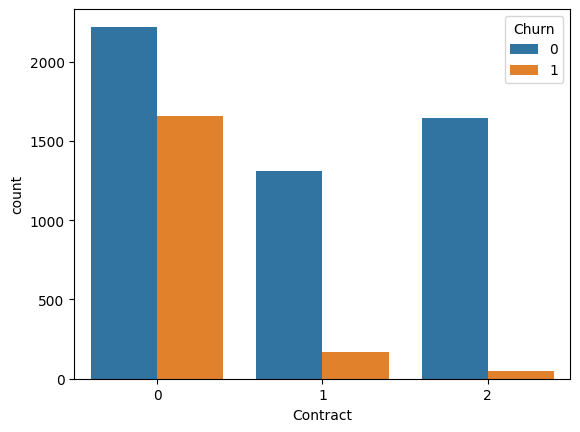

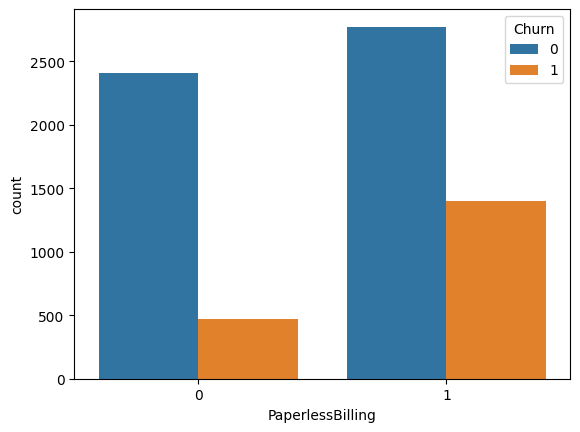

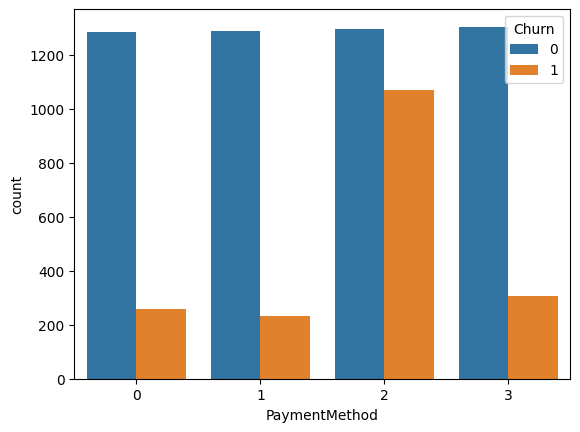

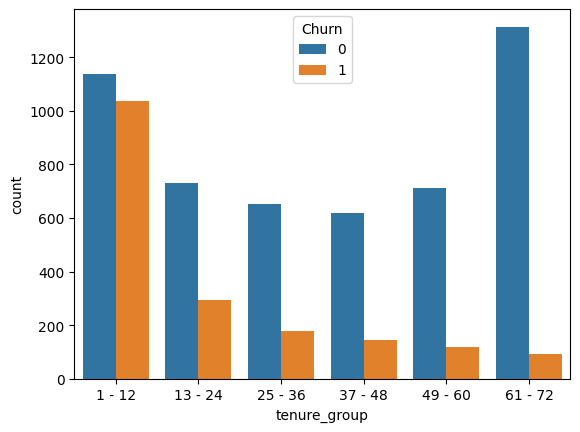

In [ ]:
for i,pred in enumerate(df1.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=df1,x=pred, hue='Churn')

In [ ]:
df1_dummies=pd.get_dummies(df1)
df1_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,0,1,0,1,0,0,2,...,2,142,2505,0,1,0,0,0,0,0
1,1,0,0,0,34,1,0,0,2,0,...,3,498,1466,0,0,0,1,0,0,0
2,1,0,0,0,2,1,0,0,2,2,...,3,436,157,1,1,0,0,0,0,0
3,1,0,0,0,45,0,1,0,2,0,...,0,266,1400,0,0,0,0,1,0,0
4,0,0,0,0,2,1,0,1,0,0,...,2,729,925,1,1,0,0,0,0,0


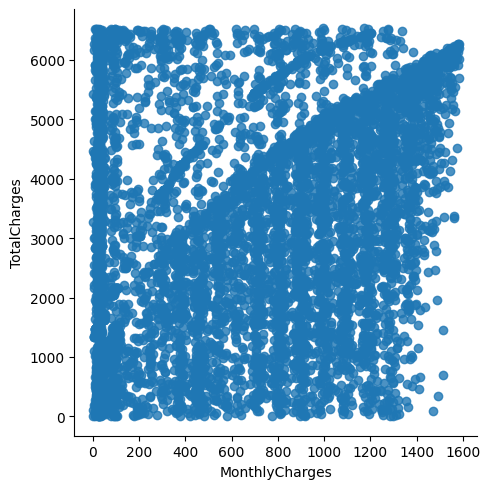

In [ ]:
sns.lmplot(data=df1_dummies,x="MonthlyCharges",y="TotalCharges",fit_reg=False)

<Axes: >

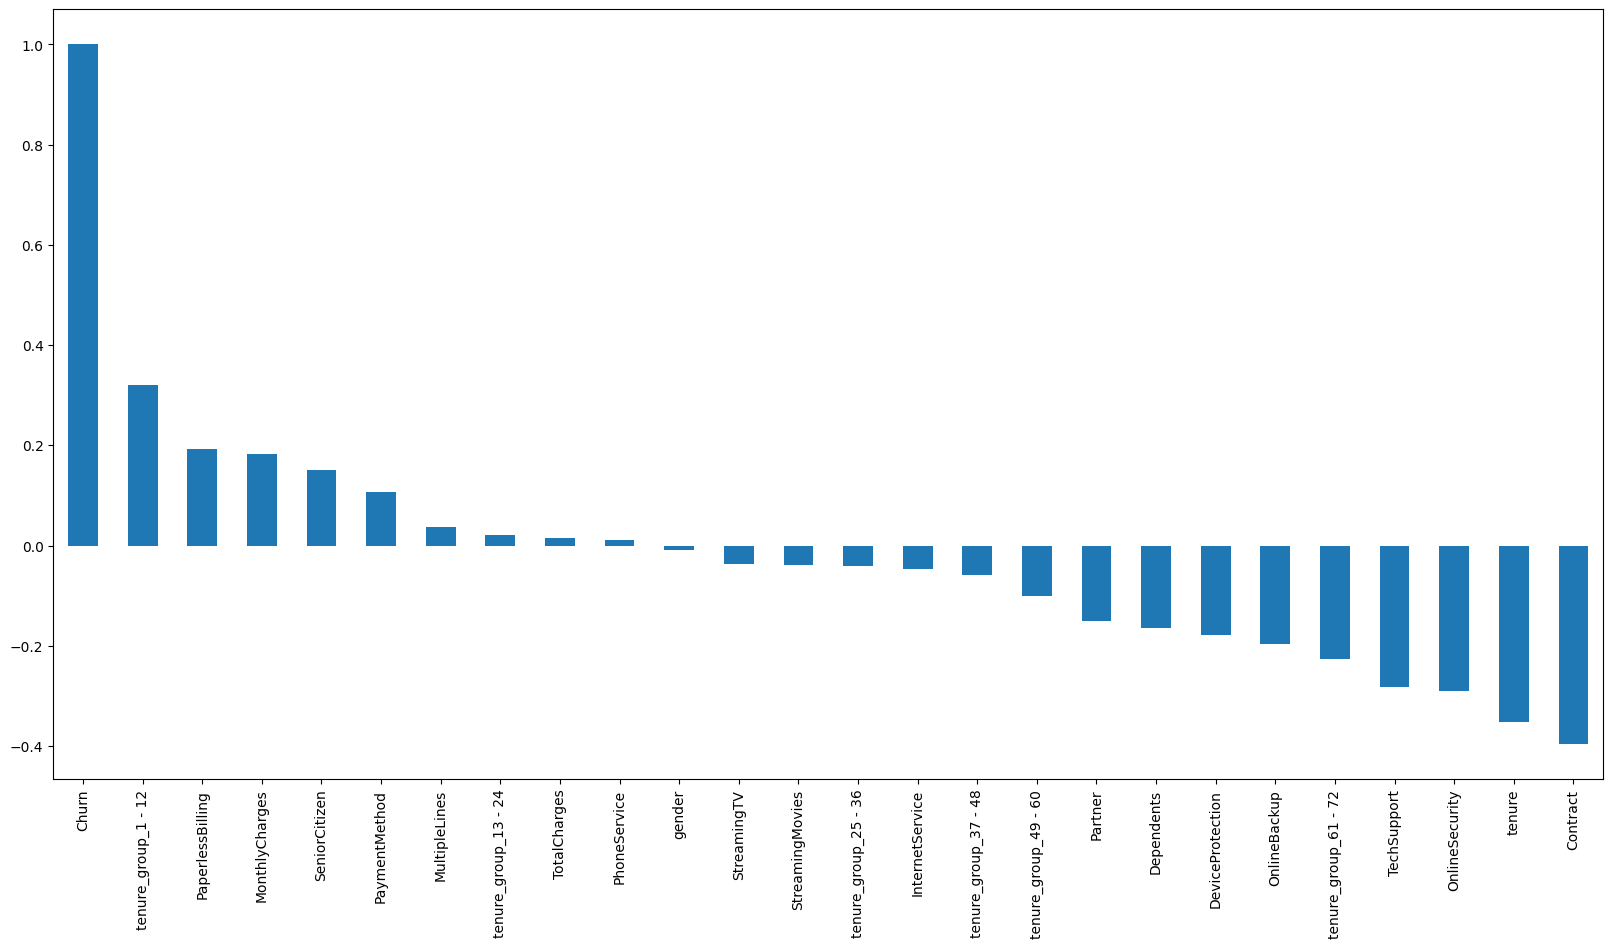

In [ ]:
plt.figure(figsize=(20,10))
df1_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

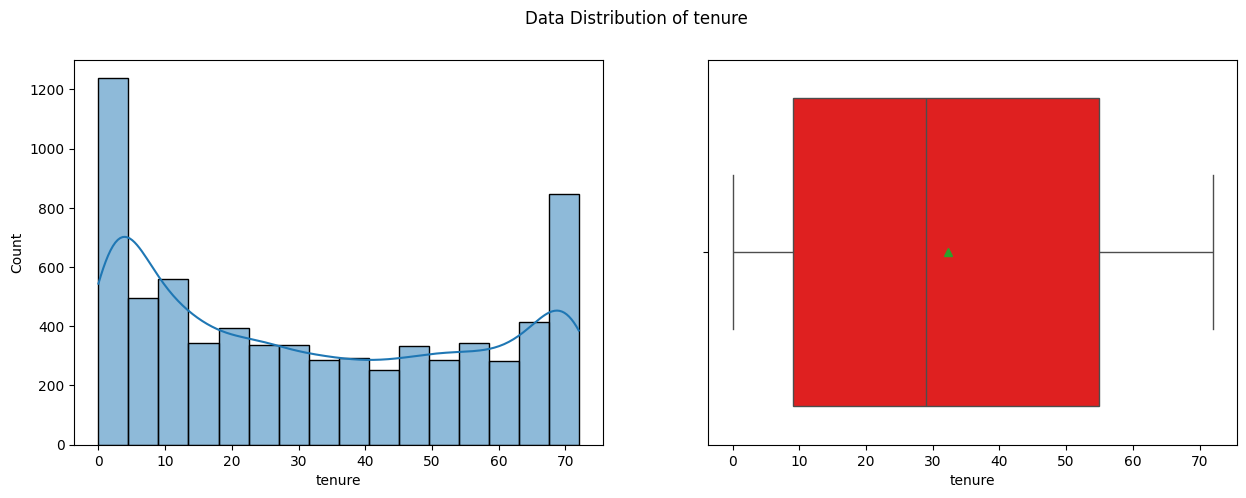

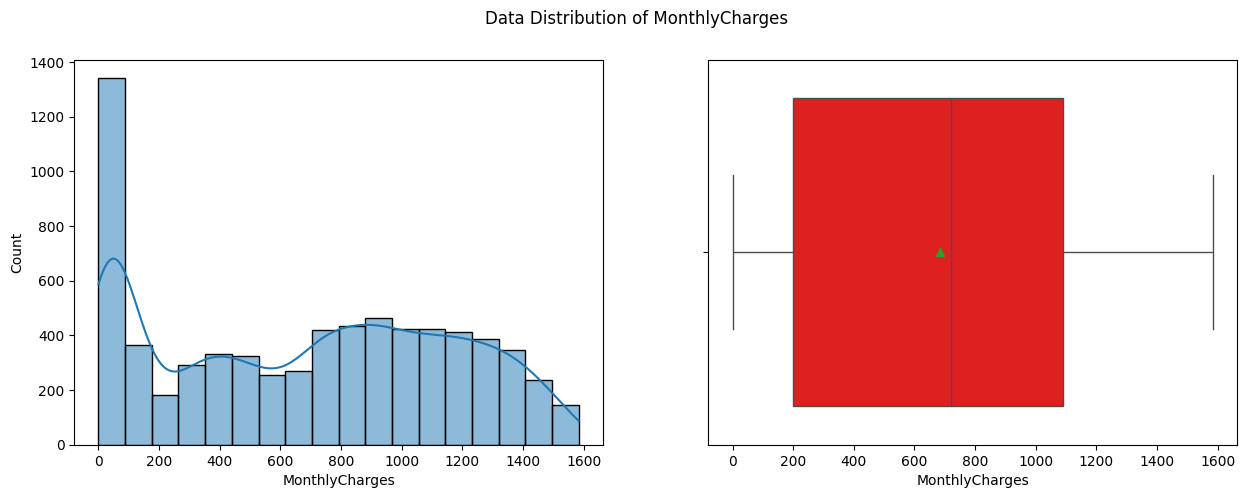

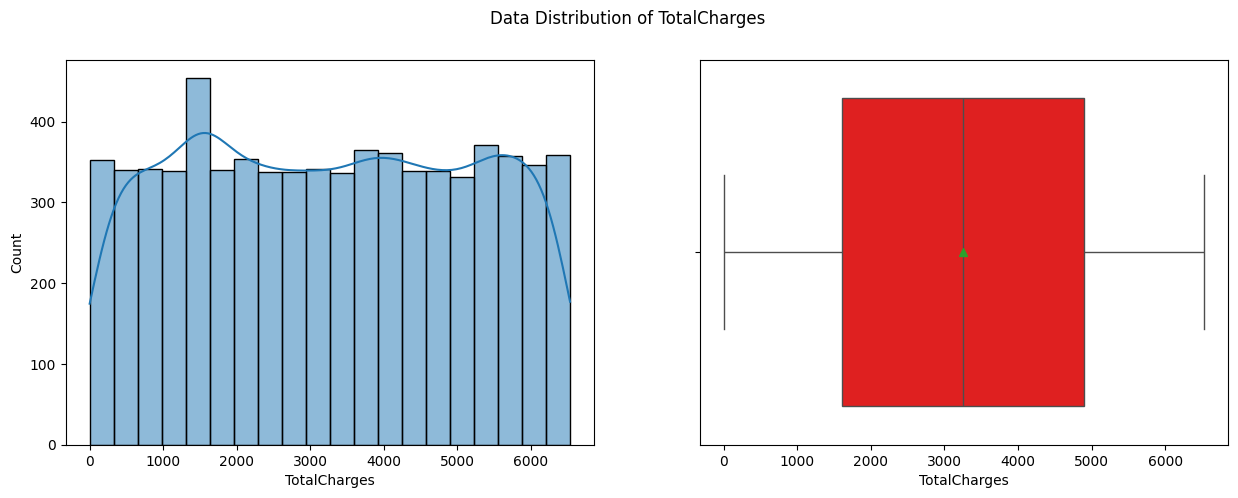

In [ ]:
#data distribution visualization using histograms & boxplot

for col in ['tenure','MonthlyCharges','TotalCharges']:
  fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
  sns.histplot(df1[col],ax=axes[0],kde=True)
  sns.boxplot(df1[col],ax=axes[1],orient='h',showmeans=True,color='red')
  fig.suptitle("Data Distribution of "+col,fontsize=12)
  plt.show()

In [ ]:
correlation=x_train.corr()
correlation

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,0.002011,0.006334,0.012989,-0.000089,-0.006110,-0.000268,0.000286,-0.013252,-0.011506,-0.005091,-0.009597,-0.020527,-0.018619,-0.001502,-0.005012,0.010849,-0.019846,-0.004173
SeniorCitizen,0.002011,1.000000,0.014956,-0.211284,0.014038,0.010016,0.158516,-0.031891,-0.129408,-0.011948,-0.015139,-0.151755,0.024891,0.049188,-0.141979,0.141069,-0.038821,0.222053,0.027187
Partner,0.006334,0.014956,1.000000,0.448172,0.377111,0.014066,0.133984,-0.000343,0.139512,0.151964,0.177185,0.114405,0.138851,0.126112,0.292121,-0.017897,-0.151023,0.100291,0.057423
Dependents,0.012989,-0.211284,0.448172,1.000000,0.159839,-0.006592,-0.040204,0.039666,0.149617,0.083873,0.083484,0.127625,0.050278,0.021788,0.238955,-0.112953,-0.032424,-0.113503,-0.004960
tenure,-0.000089,0.014038,0.377111,0.159839,1.000000,0.008735,0.341929,-0.029811,0.321441,0.365535,0.366995,0.316778,0.296494,0.289405,0.675062,0.005877,-0.371582,0.264343,0.155981
PhoneService,-0.006110,0.010016,0.014066,-0.006592,0.008735,1.000000,-0.020714,0.382235,-0.022096,0.025550,0.012659,-0.011983,0.061753,0.049760,-0.000225,0.017219,0.001039,0.268524,0.080429
MultipleLines,-0.000268,0.158516,0.133984,-0.040204,0.341929,-0.020714,1.000000,-0.110389,0.008181,0.122481,0.122429,0.000777,0.176870,0.184080,0.106425,0.167603,-0.176322,0.446973,0.110171
InternetService,0.000286,-0.031891,-0.000343,0.039666,-0.029811,0.382235,-0.110389,1.000000,-0.028460,0.039350,0.042721,-0.022741,0.111333,0.101701,0.103553,-0.138221,0.086887,-0.250200,-0.063294
OnlineSecurity,-0.013252,-0.129408,0.139512,0.149617,0.321441,-0.022096,0.008181,-0.028460,1.000000,0.178334,0.170590,0.277122,0.049589,0.064787,0.380969,-0.163180,-0.093928,-0.050952,0.041586
OnlineBackup,-0.011506,-0.011948,0.151964,0.083873,0.365535,0.025550,0.122481,0.039350,0.178334,1.000000,0.181097,0.183466,0.151929,0.129209,0.275825,-0.014136,-0.129135,0.138081,0.085367


<Axes: >

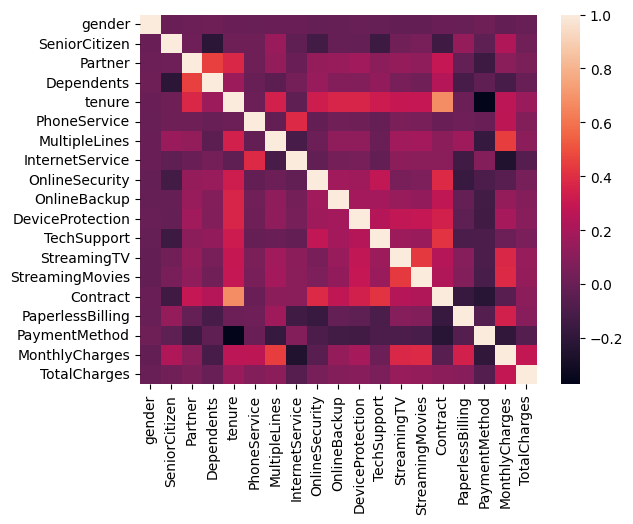

In [ ]:
sns.heatmap(x_train.corr())

# **Task 3**
**Customer Segmentation**

# Segmentation Techniques

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=333)
df1['Segment'] = kmeans.fit_predict(df1[numerical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



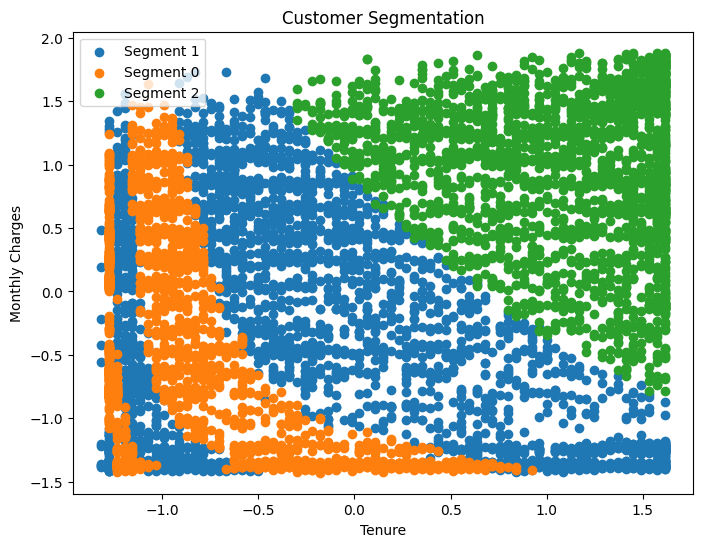

In [ ]:
plt.figure(figsize=(8, 6))
for segment in df1['Segment'].unique():
    plt.scatter(df1[df1['Segment'] == segment]['tenure'],
                df1[df1['Segment'] == segment]['MonthlyCharges'],
                label=f'Segment {segment}')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# Understanding of customer behavior

visualizing churn distribution by gender

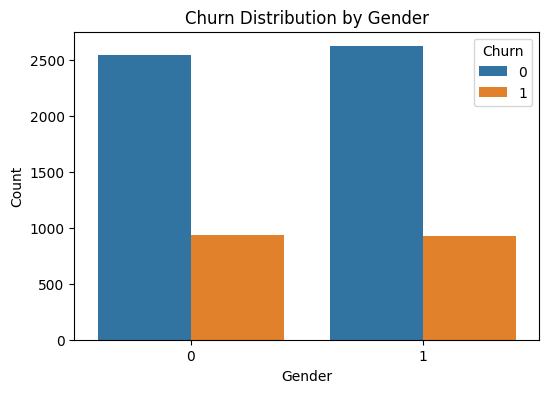

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df1)
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

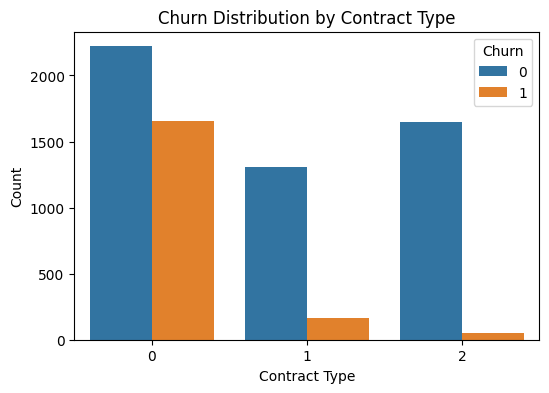

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=df1)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Churn analysis within segments

In [ ]:
churn_rates = df1.groupby('Contract')['Churn'].mean()

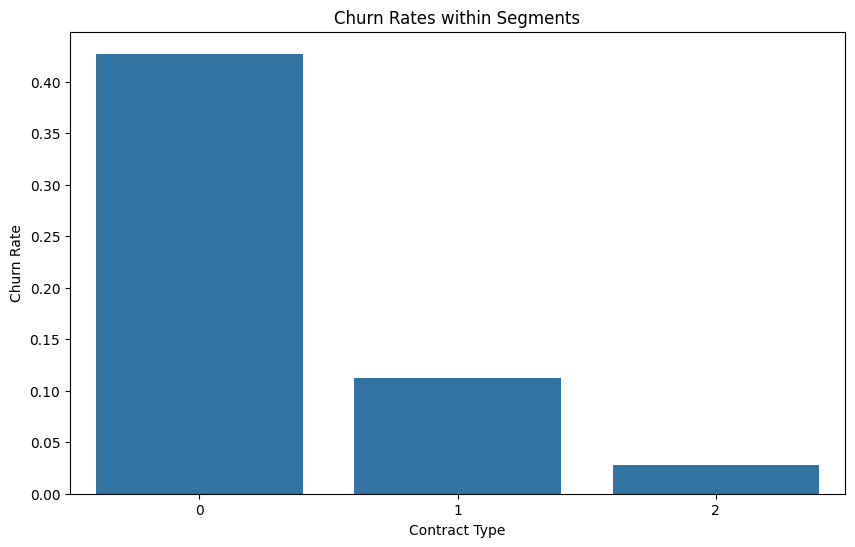

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values)
plt.title('Churn Rates within Segments')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

# Identifying High Value Customers

In [ ]:
high_value_customers= df1[df1['TotalCharges'] > df1['TotalCharges'].quantile(0.75)]
print(high_value_customers)

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5          0              0        0           0 -0.992402             1   
15         0              0        1           1  1.491540             1   
17         1              0        0           1  1.572981             1   
28         1              0        1           0  1.613701             1   
30         0              1        1           0  1.572981             1   
...      ...            ...      ...         ...       ...           ...   
7032       1              1        0           0 -1.277445             1   
7034       0              0        0           0  1.410099             1   
7036       0              0        0           0 -0.829521             0   
7039       0              0        1           1  1.613701             1   
7042       1              0        0           0  1.369379             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
5           

In [ ]:
pip install scikit-learn


# **TASK 4**

# **Churn Prediction Model**


# X_train,Y_train & X_test,Y_test

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5634, 19)
(1409, 19)
(5634,)
(1409,)


# Applying various Machine Learning Algorithms

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }
print("Evaluation Metrics:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Evaluation Metrics:
Logistic Regression:
  Accuracy: 0.7771469127040455
  Precision: 0.5920245398773006
  Recall: 0.516042780748663
  F1-score: 0.5514285714285714

Decision Tree:
  Accuracy: 0.7068843151171044
  Precision: 0.4474393530997305
  Recall: 0.44385026737967914
  F1-score: 0.44563758389261743

Random Forest:
  Accuracy: 0.7899219304471257
  Precision: 0.6354166666666666
  Recall: 0.4893048128342246
  F1-score: 0.552870090634441

SVM:
  Accuracy: 0.7345635202271115
  Precision: 0.0
  Recall: 0.0
  F1-score: 0.0

KNN:
  Accuracy: 0.7444996451383961
  Precision: 0.5259259259259259
  Recall: 0.37967914438502676
  F1-score: 0.44099378881987583

Gradient Boosting:
  Accuracy: 0.7814052519517388
  Precision: 0.609271523178808
  Recall: 0.4919786096256685
  F1-score: 0.5443786982248521



# Choosing the Best Model among them



In [ ]:
best_model_name = max(results, key=lambda x: results[x]["Accuracy"])
print(f"Best Model: {best_model_name}")
print(f"Best Model based on Accuracy: {best_model_name}")

Best Model: Random Forest
Best Model based on Accuracy: Random Forest


In [ ]:
best_model = models[best_model_name]
best_model.fit(x,y)

RandomForestClassifier()

# Prediction Using Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
user_record = pd.DataFrame({
    'gender': ['Female'],
    'SeniorCitizen': [0],
    'Partner': ['No'],
    'Dependents': ['No'],
    'tenure': [10],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['Yes'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['Yes'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['Yes'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [50],
    'TotalCharges': [500]
})


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = user_record.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
for column, encoder in label_encoders.items():
    encoder.fit(user_record[column])
for column, encoder in label_encoders.items():
    user_record[column] = encoder.transform(user_record[column])
print("Preprocessed User Record:")
print(user_record)


Preprocessed User Record:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0      10             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 0              0              50           500  


In [ ]:
prediction = best_model.predict(user_record)
if prediction==0:
  print("Churn = No")
else:
  print("Churn = Yes")

Churn = No


# Understanding of classification metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# y_true = df1['Churn']
y_true=y_test
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

recall = recall_score(y_true, y_pred)
print("Recall:", recall)

f1 = f1_score(y_true, y_pred)
print("F1-score:", f1)

report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7814052519517388
Precision: 0.609271523178808
Recall: 0.4919786096256685
F1-score: 0.5443786982248521
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:
[[917 118]
 [190 184]]
